In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt

In [5]:
data = pd.read_csv('EOCC_Data_Robot_Input.csv')

In [ ]:
#pca
pca1 = PCA(n_components=1)
pc_d_l = principalComponents = pca1.fit_transform(data[['CAR_AGE IN DAYS','LIFE TO DATE MILEAGE']])
data['PCA_d_l']=pc_d_l
#data = data.drop(['Mileage_since_last _failure','weeks_in_service'],axis = 1)

In [6]:
data.head()

,key,CAR NUMBER,LOCATION,CONDITION CODE,is_new,RESPONSE CODE,WHY MADE,PART APPLIED DATE,UPDATED PART REPAIR DATE,weeks_in_service,...,BOCT,CN,CPRS,CSXT,FXE,KCS,KCSM,NSS,ST,UP
0,83500A,83500,A,1,1,0,0,3/23/2018,11/15/2018,33.86,...,0,3,0,3,0,0,0,4,0,15
1,83500B,83500,B,1,1,0,0,6/6/2018,11/15/2018,23.14,...,0,3,0,3,0,0,0,4,0,15
2,83503A,83503,A,3,0,0,0,12/19/2014,11/15/2018,203.86,...,0,6,0,6,0,0,0,5,0,23
3,83503B,83503,B,3,0,0,0,10/20/2016,11/15/2018,108.00,...,0,6,0,6,0,0,0,5,0,23
4,83505A,83505,A,1,1,0,0,6/22/2017,11/15/2018,73.00,...,0,9,3,12,0,1,0,2,0,28


In [7]:
data['CAR_CLASS'] = pd.factorize(data.CAR_CLASS)[0]
data['EQUIP_FEAT_DESC'] = pd.factorize(data.EQUIP_FEAT_DESC)[0]
data['car_length'] = pd.factorize(data.car_length)[0]
data['car_tonnage'] = pd.factorize(data.car_tonnage)[0]
data['BUILDER_NAME'] = pd.factorize(data.BUILDER_NAME)[0]

In [8]:
data1 = pd.DataFrame(data['CAR NUMBER'].unique())
data1.columns=['CAR NUMBER']
data2=pd.DataFrame(np.random.rand(len(data['CAR NUMBER'].unique())))
data2.columns=['RandomNum']
data1['RandomNum']=pd.DataFrame(np.random.rand(len(data['CAR NUMBER'].unique())))
data_w_rand=pd.merge(data,data1,on='CAR NUMBER',how='left')

data_new =data_w_rand.drop(['CAR NUMBER','key','LOCATION','RESPONSE CODE','WHY MADE','PART APPLIED DATE','UPDATED PART REPAIR DATE','UPDATED PART REPAIR DATE','BUILT DATE'],axis =1)

#train and test  
data_train = data_new[data_new['RandomNum'] <= 0.75]
data_test = data_new[data_new['RandomNum'] > 0.75]

y_train = data_train['TARGET']
x_train = data_train.drop(['TARGET'],axis =1)
y_test = data_test['TARGET']
x_test = data_test.drop(['TARGET'],axis =1)

clf = RandomForestClassifier(random_state=1234,
                                    min_samples_split=2,
                                     max_leaf_nodes=5000,
                                     max_features=0.2,
                                     bootstrap = False, 
                                     n_estimators= 500,
                                     criterion='gini',
                                     min_samples_leaf=20,                             
                                    n_jobs = -1).fit(x_train,y_train)

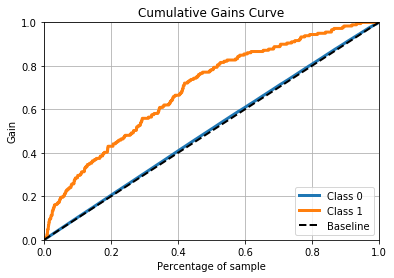

In [9]:
predicted_probas = clf.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [10]:
clf = GradientBoostingClassifier(loss=  'exponential',
                                n_estimators = 500,
                                random_state = 0,
                                ).fit(x_train,y_train)
predicted_probas = clf.predict_proba(x_test)

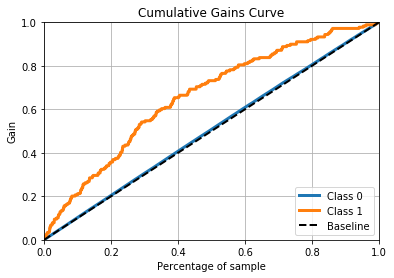

In [11]:
predicted_probas = clf.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [94]:
y_predict_test = (predicted_probas [:,1] >= 0.04).astype('int')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_test)

array([[3190,  730],
       [ 115,   64]], dtype=int64)

In [95]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
metrics.auc(fpr, tpr)

0.58565870482271121

In [96]:
sort_prob= sorted(predicted_probas[:,1],reverse = True )
index_sort = (-predicted_probas[:,1]).argsort()
thres = np.linspace(0,1,100)
score = []
for t in range(len(thres)):
    len_thres = int(np.ceil(len(y_test)*thres[t]))
    y_thres_test = []
    for i in range(len_thres):
        y_thres_test.append(y_test[y_test.index[index_sort[i]]])
    score.append(sum(y_thres_test)*1.0 / sum(y_test))
%matplotlib notebook
plt.plot(thres,score)
plt.plot(thres,thres)
plt.xlabel('percentage of sample')
plt.ylabel('gain')
plt.grid()

In [99]:
score[10]

0.25139664804469275

In [101]:
len_ten = int(np.ceil(len(y_test)*0.1))
y_ten_test = y_test[y_test.index[index_sort[0:len_ten]]]

In [102]:
1.0*sum(y_ten_test)/ sum(y_test)

0.25139664804469275

In [46]:
index_one = []
for i in range(len(y_ten_test)):
    if y_ten_test[y_ten_test.index[i]] == 1:
        index_one.append(y_ten_test.index[i])

In [103]:
x_test.head()

,CONDITION CODE,is_new,weeks_in_service,EOCC_POCKET,Mileage_since_last _failure,CAR_CLASS,EQUIP_FEAT_DESC,car_length,car_tonnage,car_age,...,BOCT,CN,CPRS,CSXT,FXE,KCS,KCSM,NSS,ST,UP
15758,1,1,23,9,491913,13,2,1,1,20,...,0,3,4,4,0,1,0,2,0,15
4041,1,1,33,3,267410,3,0,0,0,32,...,0,12,1,18,0,0,0,1,1,8
6229,3,0,15,9,331771,5,1,1,0,27,...,0,0,5,12,0,0,0,7,1,16
20679,3,0,20,10,116788,16,2,1,1,12,...,0,8,7,5,0,1,0,5,0,14
1730,1,1,31,9,567753,2,1,1,0,25,...,0,0,2,4,0,0,0,1,1,10


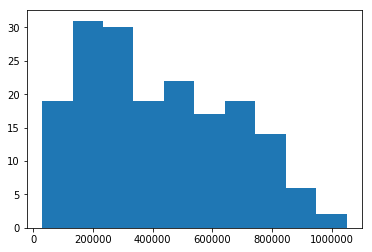

In [104]:
mile = []
for i in range(len(x_test)):
    if y_test[y_test.index[i]] == 1:
        mile.append(x_test['Mileage_since_last _failure'][y_test.index[i]])
plt.hist(mile)
plt.show()

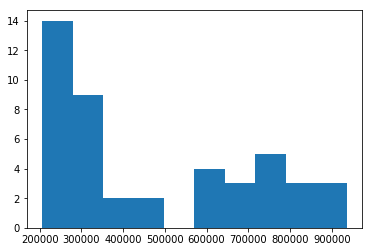

In [105]:
mile = []
for i in range(len(y_ten_test)):
    if y_test[y_ten_test.index[i]] == 1:
        mile.append(x_test['Mileage_since_last _failure'][y_ten_test.index[i]])
plt.hist(mile)
plt.show()

45